In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Code to display graphs in the notebook
%matplotlib inline

In [3]:
#Create a file path
path= r'C:\Users\Zinnia\Documents\Career Foundry Data Analytics Course\Achievement 6\Data\Edited'

In [4]:
#Import Data
df=pd.read_csv(os.path.join(path, 'Edited_Open_Space_Municipal_with_Total_Acres.csv'), index_col=False)

#Data checks and cleaning

In [5]:
df.columns

Index(['County', 'Municipality', 'Total_Acres_Open_Space', 'Total SQ MI',
       'Total Acres'],
      dtype='object')

In [6]:
df.head()

,County,Municipality,Total_Acres_Open_Space,Total SQ MI,Total Acres
0,Monmouth,Aberdeen Township,632.434504,5.400,3456.00
1,Atlantic,Absecon City,390.772836,5.468,3499.52
2,Hunterdon,Alexandria Township,1129.808736,27.534,17621.76
3,Warren,Allamuchy Township,5719.500007,19.992,12794.88
4,Bergen,Allendale Borough,217.481640,3.097,1982.08


In [7]:
df.shape

(554, 5)

In [8]:
# Check for missing values

df.isnull().sum()

County                    0
Municipality              0
Total_Acres_Open_Space    0
Total SQ MI               0
Total Acres               0
dtype: int64

#No missing values found

In [9]:
#Check for duplicates
dups = df.duplicated()

In [10]:
dups.shape

(554,)

#No duplicates found

<AxesSubplot:xlabel='Total_Acres_Open_Space', ylabel='Count'>

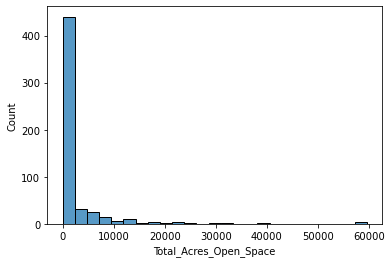

In [11]:
#Check for extreme values
sns.histplot(df['Total_Acres_Open_Space'], bins=25)

#This shows that most individual municipalities have a low acreage of open space and very few ohld large amounts. 

In [12]:
#More data checks
df['Total_Acres_Open_Space'].mean()

2726.068368037095

In [13]:
df['Total_Acres_Open_Space'].median()

269.40609870000003

In [14]:
df['Total_Acres_Open_Space'].max()

59549.23301

In [15]:
df['Total_Acres_Open_Space'].min()

0.1469246

In [16]:
df.columns

Index(['County', 'Municipality', 'Total_Acres_Open_Space', 'Total SQ MI',
       'Total Acres'],
      dtype='object')

#My hypothesis is that there is a positive correlation between the total acres in the county/municipality and the amount of preserved open space in the county/municipality

## Regression Analysis

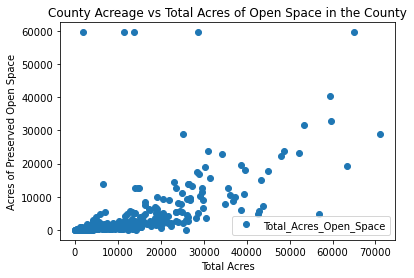

In [17]:
#Create a satterplot

df.plot(x = 'Total Acres', y='Total_Acres_Open_Space',style='o')
plt.title('County Acreage vs Total Acres of Open Space in the County')  
plt.xlabel('Total Acres')  
plt.ylabel('Acres of Preserved Open Space')  
plt.show()

#This is already interesting! I can see a positive correlation between my variables at last! There are a few more outliers at the municipal level than at the county level. 

In [18]:
#Put the variables into NumPy arrays as objects

X = df['Total Acres'].values.reshape(-1,1)
y = df['Total_Acres_Open_Space'].values.reshape(-1,1)

In [19]:
X

array([[3.456000e+03],
       [3.499520e+03],
       [1.762176e+04],
       [1.279488e+04],
       [1.982080e+03],
       [1.600000e+02],
       [3.814400e+02],
       [2.142528e+04],
       [1.075840e+03],
       [4.096640e+03],
       [8.627200e+02],
       [1.282816e+04],
       [9.145600e+02],
       [6.886400e+03],
       [8.089600e+02],
       [9.484800e+02],
       [2.732800e+03],
       [2.726400e+02],
       [5.318400e+02],
       [2.191296e+04],
       [1.011840e+03],
       [4.807936e+04],
       [3.744000e+02],
       [3.725440e+03],
       [6.265600e+02],
       [1.768320e+03],
       [1.671872e+04],
       [2.109440e+03],
       [1.909760e+03],
       [6.688000e+02],
       [9.273600e+02],
       [1.858560e+03],
       [3.980800e+03],
       [2.733440e+04],
       [2.300160e+03],
       [2.138880e+03],
       [1.548864e+04],
       [8.215040e+03],
       [1.323712e+04],
       [1.912768e+04],
       [3.415680e+03],
       [5.632640e+03],
       [5.964800e+02],
       [4.8

In [20]:
y

array([[6.32434504e+02],
       [3.90772836e+02],
       [1.12980874e+03],
       [5.71950001e+03],
       [2.17481640e+02],
       [1.55918345e+01],
       [6.74636141e+01],
       [2.28233331e+03],
       [7.11137563e+01],
       [2.46987623e+03],
       [3.71642008e+02],
       [2.46066332e+03],
       [1.11491721e+02],
       [9.41670537e+02],
       [7.31720263e+01],
       [2.13528970e+01],
       [1.90083701e+03],
       [2.97792497e+01],
       [1.08708350e+02],
       [8.96972747e+03],
       [3.70475934e+00],
       [2.22182925e+04],
       [2.56476706e+01],
       [2.16876969e+02],
       [4.03924586e+01],
       [4.93379368e+02],
       [1.74548557e+03],
       [2.20636919e+02],
       [5.90449497e+01],
       [7.13366943e+01],
       [9.02717966e+01],
       [8.91278695e+01],
       [5.75111323e+02],
       [1.31251941e+04],
       [2.25069594e+02],
       [3.15682757e+01],
       [2.53985285e+03],
       [5.06251856e+02],
       [2.57812655e+03],
       [2.76234583e+03],


In [21]:
# Split data into a training set and a test set using the train_test_split function

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#I decided to try it on the municipal data to see what difference it made

In [22]:
# Create a regression object for the training set

regression = LinearRegression()

In [23]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [24]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

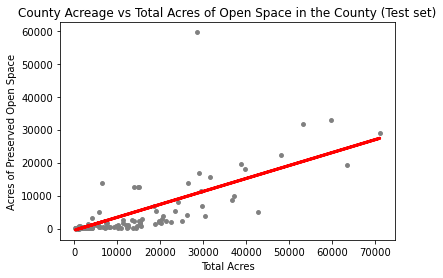

In [25]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('County Acreage vs Total Acres of Open Space in the County (Test set)')
plot_test.xlabel('Total Acres')
plot_test.ylabel('Acres of Preserved Open Space')
plot_test.show()

In [26]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [27]:
# Print the model summary statistics and evaluate the model

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.3932125]]
Mean squared error:  23665122.187369622
R2 score:  0.5455426846213793


In [28]:
y_predicted

array([[ 2.30575258e+03],
       [ 3.35182582e+00],
       [-2.33708127e+02],
       [-4.11912863e+01],
       [ 2.01710314e+03],
       [ 2.69858759e+03],
       [ 3.36270778e+03],
       [ 7.19794523e+03],
       [ 9.82293669e+02],
       [ 5.69027413e+03],
       [ 5.24484301e+03],
       [-3.76397079e+02],
       [ 1.71335435e+03],
       [ 1.50777979e+04],
       [ 7.90280140e+02],
       [-9.42907025e+01],
       [ 1.13102237e+03],
       [-9.75622305e+01],
       [ 3.94076161e+03],
       [ 1.18503097e+04],
       [ 4.00936019e+01],
       [ 7.43472124e+02],
       [ 3.45204566e+03],
       [ 3.49608546e+03],
       [ 9.10320052e+02],
       [ 3.16915203e+02],
       [-2.73973087e+02],
       [-3.19271167e+02],
       [-3.68092431e+02],
       [ 1.11642955e+04],
       [ 1.83742076e+03],
       [-3.04675119e+02],
       [ 2.29809939e+01],
       [-4.54694383e+01],
       [ 6.21922276e+02],
       [-3.82436823e+02],
       [ 7.85247020e+02],
       [-1.48396743e+02],
       [-1.5

In [29]:
# Create a dataframe comparing the actual & predicted values of y

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,224.590952,2305.752576
1,294.762262,3.351826
2,9.066469,-233.708127
3,41.124861,-41.191286
4,13774.636920,2017.103144
5,506.251856,2698.587594
6,683.685645,3362.707780
7,1964.969204,7197.945231
8,99.545201,982.293669
9,2764.142902,5690.274130


In [30]:
# Predict y

y_predicted_train = regression.predict(X_train) 

In [31]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [32]:
#Check the model statistics for MSE and R2

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.3932125]]
Mean squared error:  35634325.05074796
R2 score:  0.33951213234263866


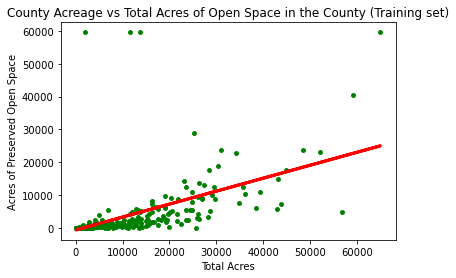

In [33]:
# Visualizing the test set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('County Acreage vs Total Acres of Open Space in the County (Training set)')
plot_test.xlabel('Total Acres')
plot_test.ylabel('Acres of Preserved Open Space')
plot_test.show()

#This algorithim was much more accurate than the county level data and shows the greater amount of variation in the data. The regression line shows a positive correlation and the data is clustered around the line. The other dataset didn't include the outliers in the high range like this one does since it has more data points. Definitely shows why having a larger data set can make a difference in accuracy of the model. 